# Esercitazione 10

Nella cartella sono presenti:
- Il codice dell'esercitazione.
- I file di input e output.
- Le cartelle con i risultati dei due casi in esame.
- I file di input della classe *random*.

<img src="Menu.png">

Per includere la classe __random__ bisogna eseguire il codice `setup.sh` nella cartella principale:
```bash
cd .. #Vado nella cartella con setup.sh
source setup.sh
```

Librerie necessarie per il notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Programmazione Parallela

Proviamo a risolvere il problema del commesso viaggiatore aumentando la potenza di calcolo, parallelizzando il codice ed utilizzando l'__algoritmo genetico__.  Facciamo in modo che dopo un certo numero di passi ci sia una *migrazione*: i vari processi (*continenti*) si scambiano il migior inividuo della loro popolazione in maniera casuale.  Infine paragoniamo i risultati ai processi senza alcuna migrazione.

### 1.1 Valore Minimo

Osserviamo l'andamento del valore minimo di ciascuna popolazione.

#rank	w/o	w/
0	275.893	270.724
1	271.205	270.724
2	273.979	270.724
3	274.33	270.724
4	271.479	270.724
5	273.54	270.724


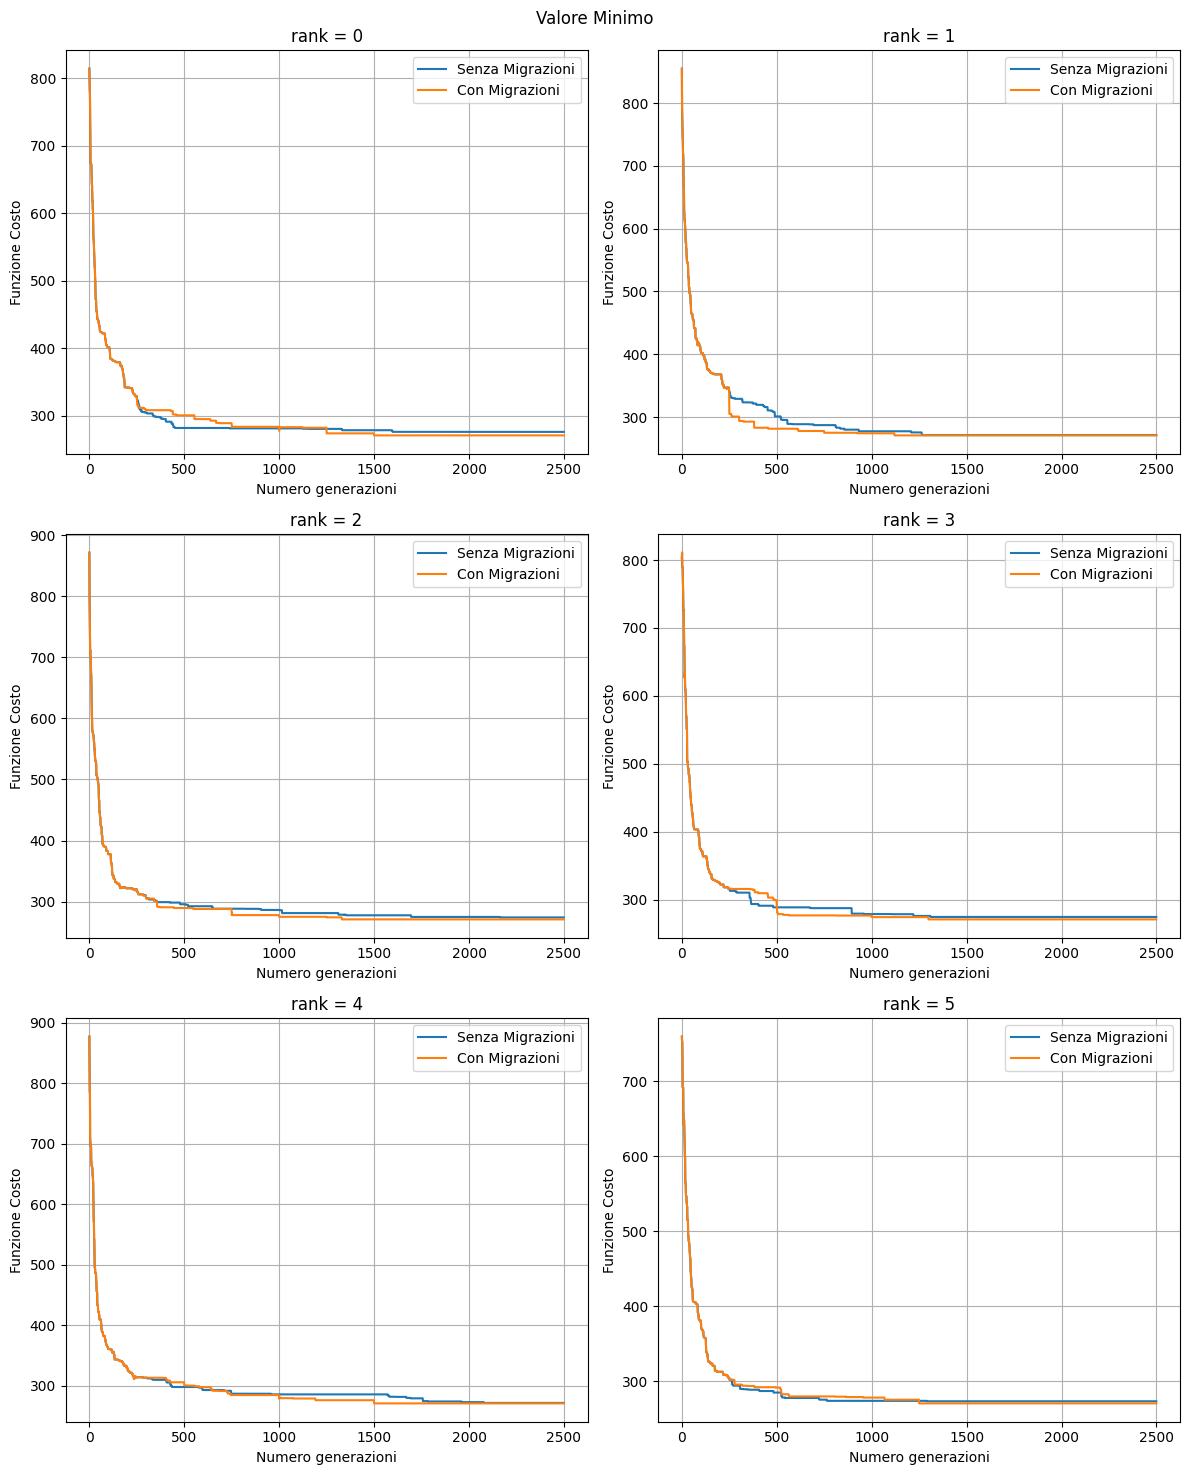

In [2]:
N=6

mins=np.zeros(2)

fig,ax=plt.subplots(3,2,figsize=(12,15))
ax=np.reshape(ax,N)
print("============================")
print("#rank\tw/o\tw/")
print("============================")

for i in range(N):
    single=np.loadtxt("Single/cost"+str(i)+".dat")
    migrat=np.loadtxt("Migration/cost"+str(i)+".dat")

    print(i,end='\t')
    print(single[-1,1],end='\t')
    print(migrat[-1,1])

    if i==1:
        mins[0]=single[-1,1]
        mins[1]=migrat[-1,1]

    ax[i].plot(single[:,0],single[:,1],label="Senza Migrazioni")
    ax[i].plot(migrat[:,0],migrat[:,1],label="Con Migrazioni")

    ax[i].set(
        xlabel="Numero generazioni",
        ylabel="Funzione Costo"
    )

    ax[i].set_title("rank = "+str(i))

    ax[i].grid(True)
    ax[i].legend()

fig.suptitle("Valore Minimo")

plt.tight_layout()
plt.show()
    

La prima cosa che notiamo è l'uniformità dei valori nel caso delle migrazioni, infatti hanno tutti lo stesso minimo.  Qusto è dovuto allo scambio di corredo genetico tra i continenti che porta parti che non sono presenti nelle altre popolazioni.  Altri effetti di questo scambio sono le evidenti "cadute" che si possono vedere nel *rank* $1$ e $3$ ed eventuali "rallentamenti" come si osserva nel *rank* $0$.

### 1.2 Media della Migliore Metà

Ora osserviamo la media della funzione costo prendendo la miglior metà della popolazione.

#rank	w/o	w/
0	275.893	270.724
1	271.205	270.724
2	273.979	270.724
3	274.33	270.724
4	271.479	270.724
5	273.54	270.724


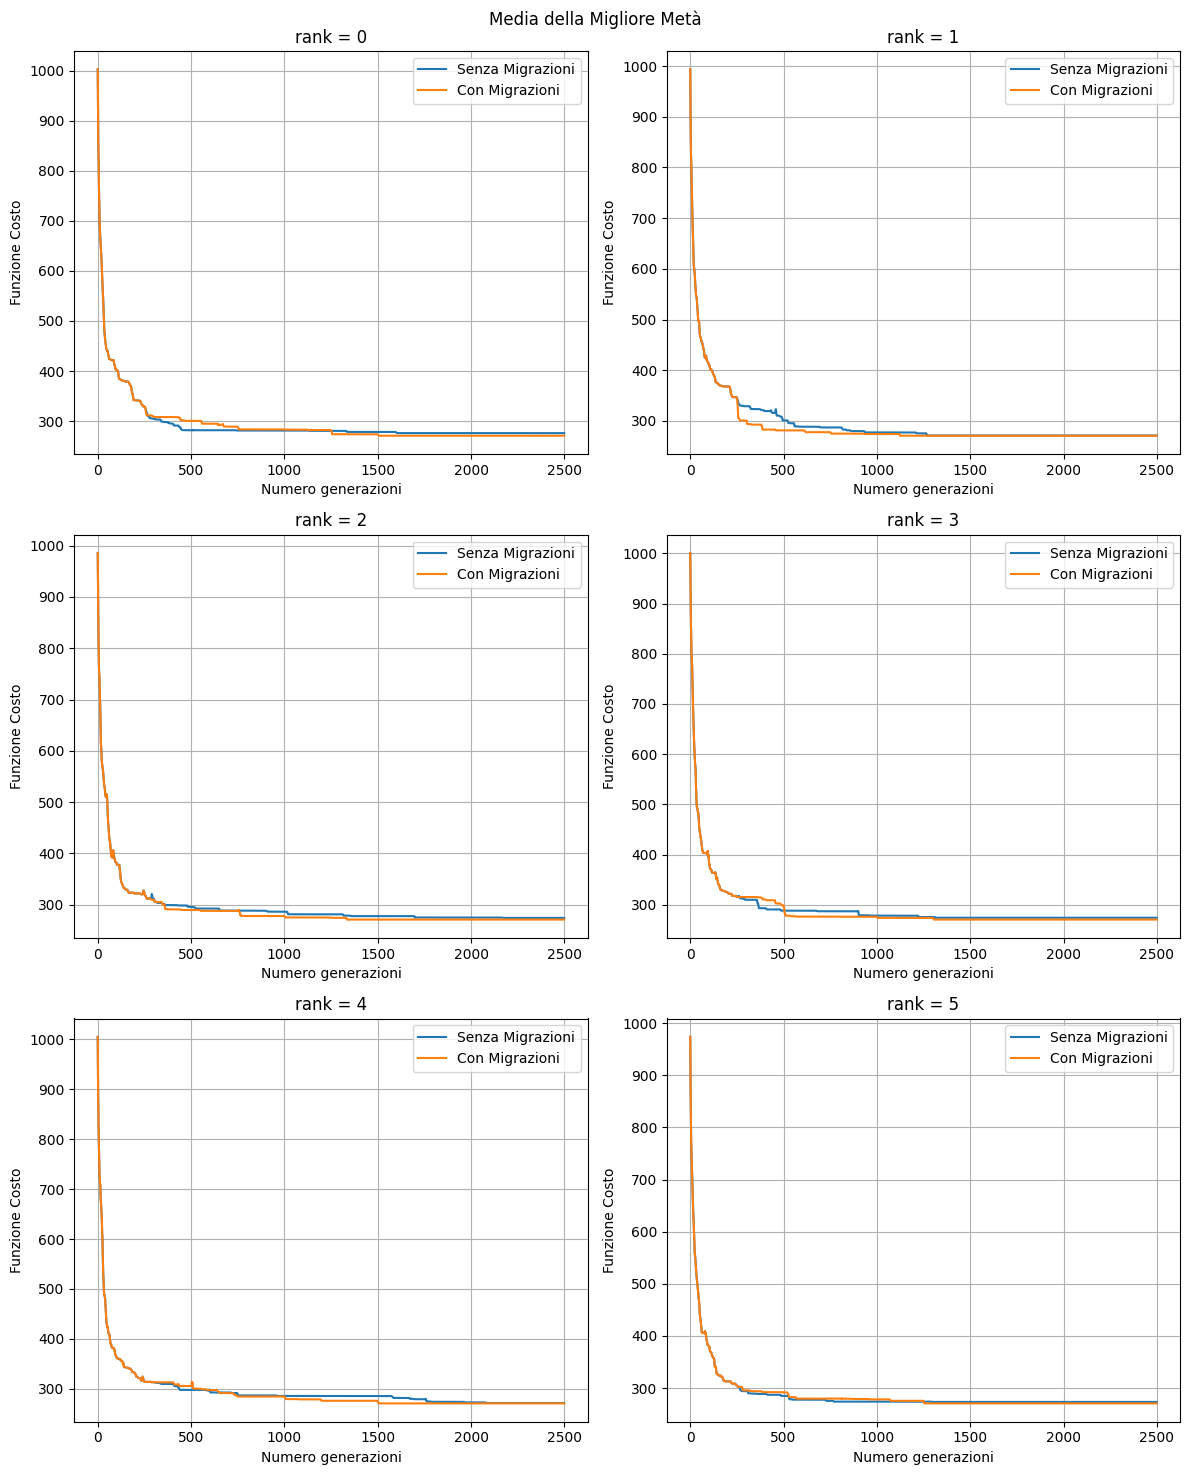

In [3]:
fig,ax=plt.subplots(3,2,figsize=(12,15))
ax=np.reshape(ax,N)
print("============================")
print("#rank\tw/o\tw/")
print("============================")

for i in range(N):
    single=np.loadtxt("Single/cost"+str(i)+".dat")
    migrat=np.loadtxt("Migration/cost"+str(i)+".dat")

    print(i,end='\t')
    print(single[-1,2],end='\t')
    print(migrat[-1,2])

    ax[i].plot(single[:,0],single[:,2],label="Senza Migrazioni")
    ax[i].plot(migrat[:,0],migrat[:,2],label="Con Migrazioni")

    ax[i].set(
        xlabel="Numero generazioni",
        ylabel="Funzione Costo"
    )

    ax[i].set_title("rank = "+str(i))

    ax[i].grid(True)
    ax[i].legend()

fig.suptitle("Media della Migliore Metà")

plt.tight_layout()
plt.show()

Il caso è analogo a quello precedente.

### 1.3 Percorsi Migliori

#### 1.3.1 Senza Migrazioni

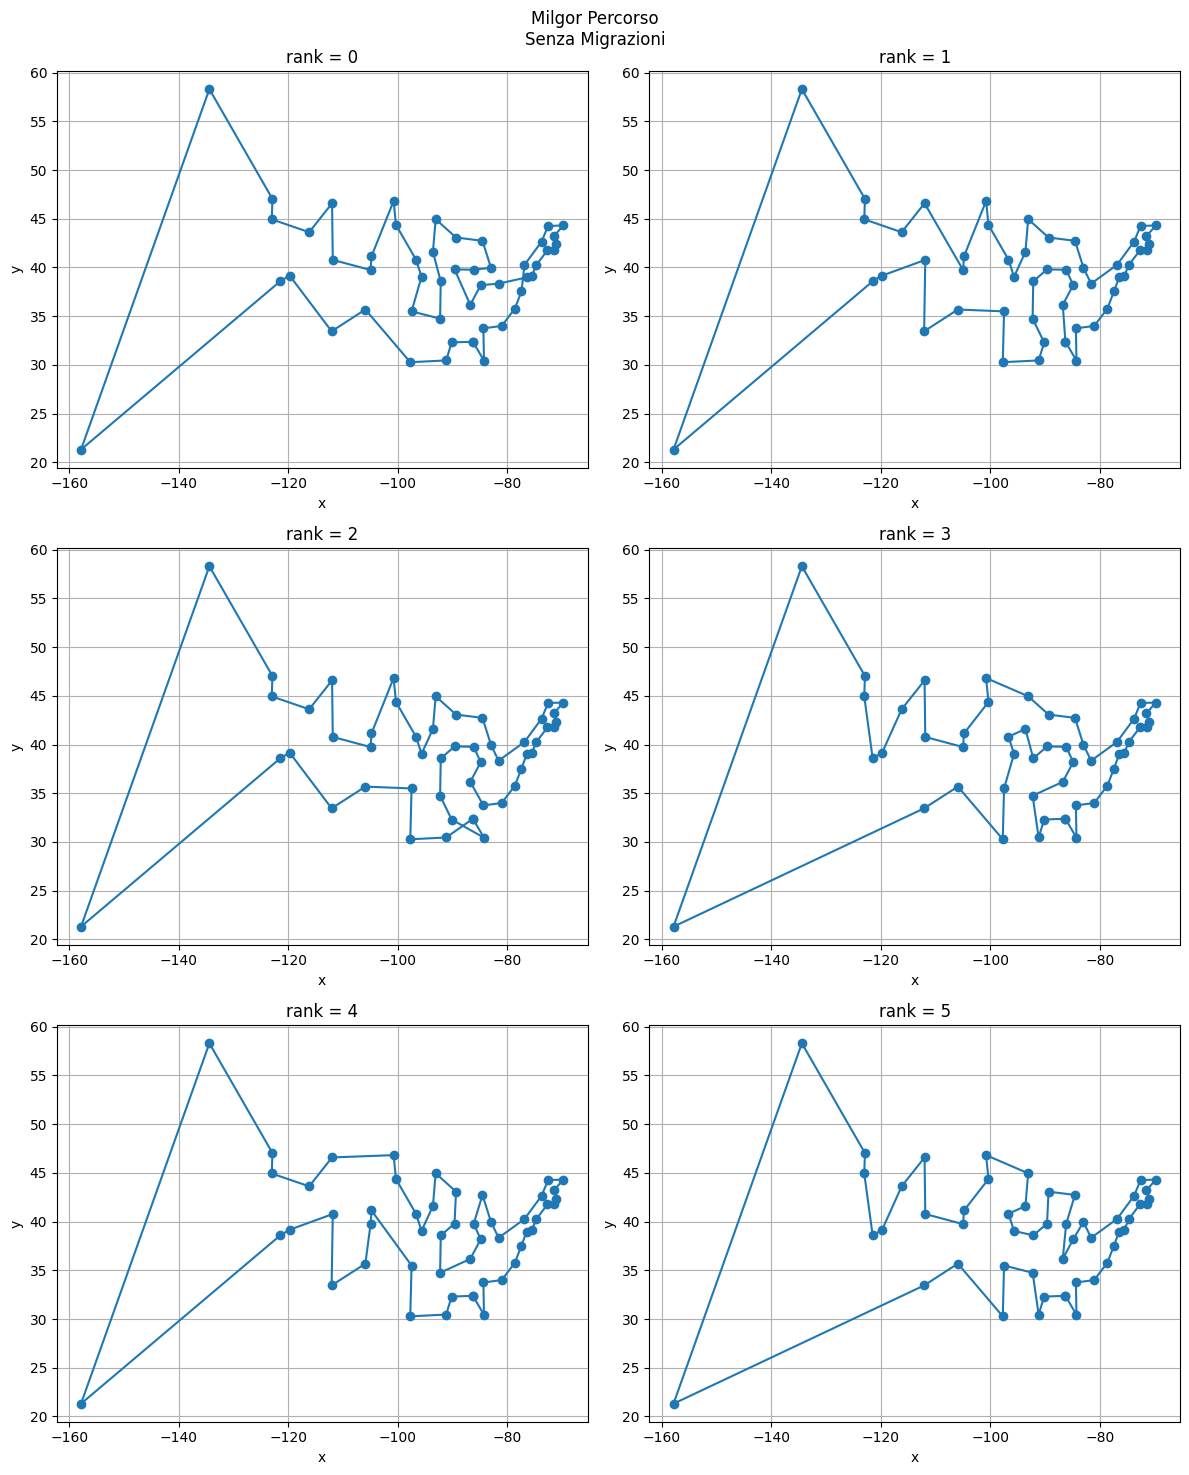

In [4]:
fig,ax=plt.subplots(3,2,figsize=(12,15))
ax=np.reshape(ax,N)

for i in range(N):
    single=np.loadtxt("Single/output"+str(i)+".dat")
    single=np.append(single,single[0])
    single=np.reshape(single,(int(np.shape(single)[0]/2),2))
    ax[i].plot(single[:,0],single[:,1],label="Senza Migrazioni",marker='o')

    ax[i].set(
        xlabel="x",
        ylabel="y"
    )

    ax[i].set_title("rank = "+str(i))

    ax[i].grid(True)

fig.suptitle(f"Milgor Percorso\nSenza Migrazioni")

plt.tight_layout()
plt.show()

Osserviamo che le soluzioni trovate, benchè sensate, in alcuni casi sono visibilmente non ottimali: per esempio nei *rank* $0$ e $2$ sono presenti incroci che ci fanno automaticamente capire che quelli possano essere al più un minimo locale.

#### 1.3.2 Con Migrazioni

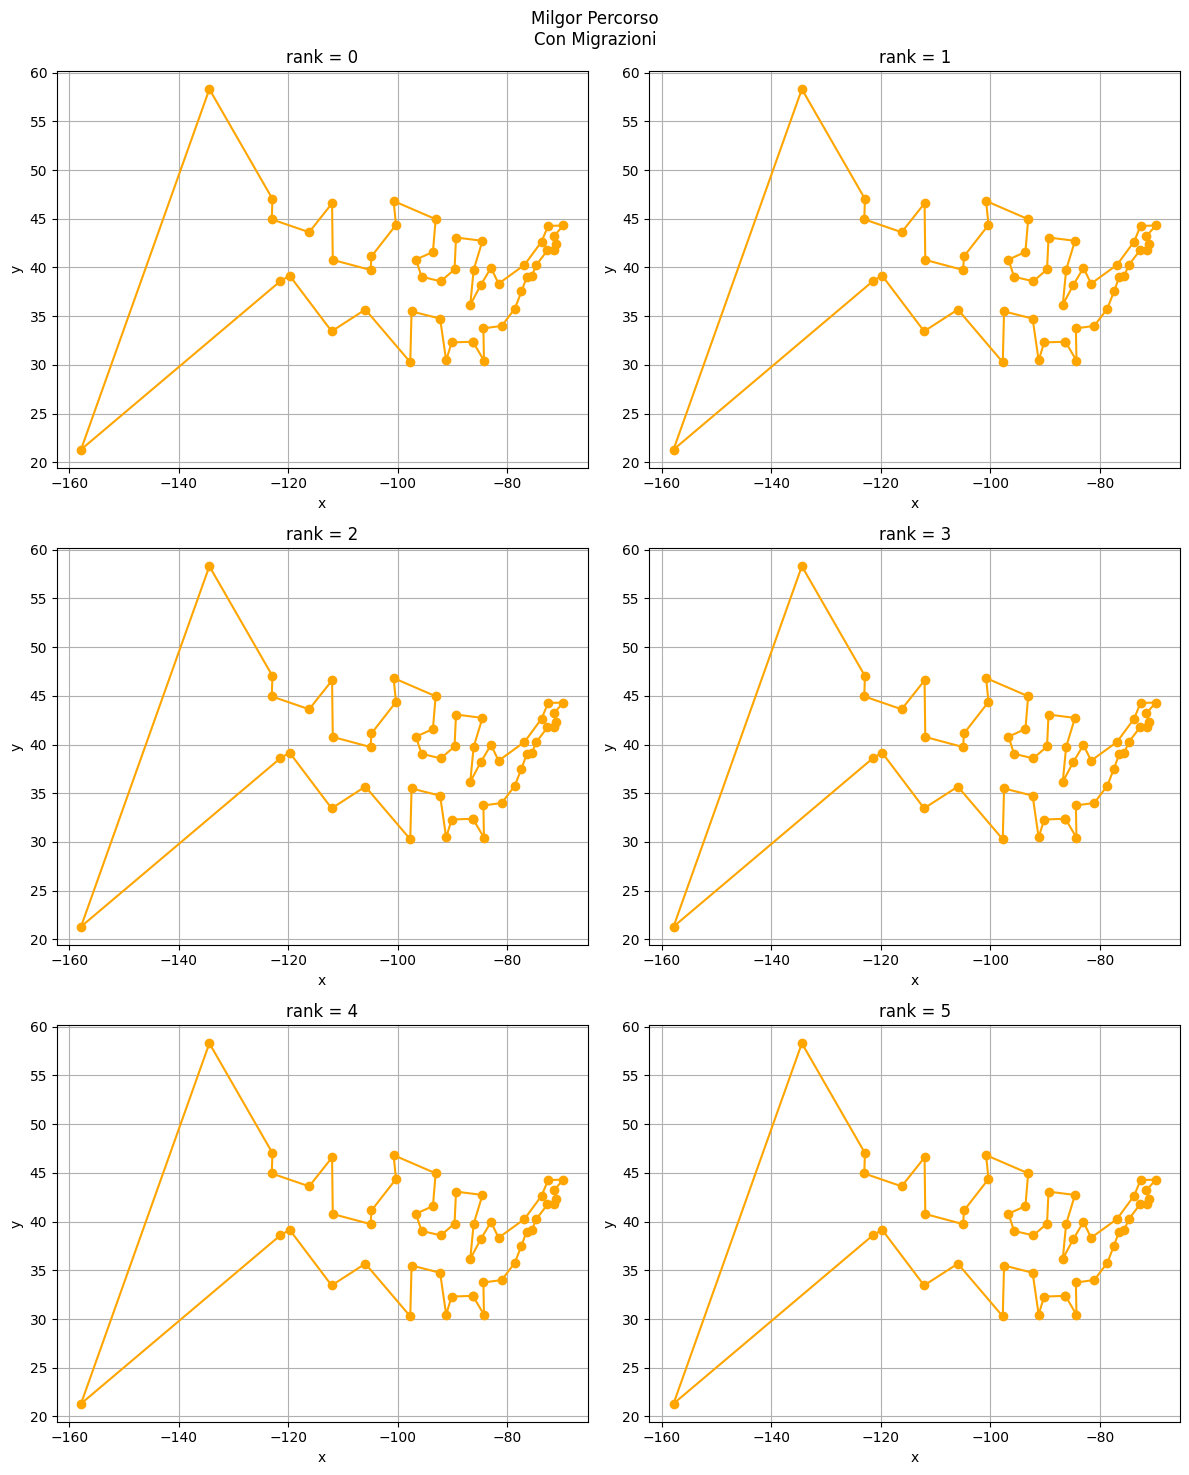

In [5]:
fig,ax=plt.subplots(3,2,figsize=(12,15))
ax=np.reshape(ax,N)

for i in range(N):
    migrat=np.loadtxt("Migration/output"+str(i)+".dat")
    migrat=np.append(migrat,migrat[0])
    migrat=np.reshape(migrat,(int(np.shape(migrat)[0]/2),2))
    ax[i].plot(migrat[:,0],migrat[:,1],label="Con Migrazioni",marker='o',color="orange")

    ax[i].set(
        xlabel="x",
        ylabel="y"
    )

    ax[i].set_title("rank = "+str(i))

    ax[i].grid(True)

fig.suptitle(f"Milgor Percorso\nCon Migrazioni")

plt.tight_layout()
plt.show()

Come potevamo aspettarci, visto che le funzioni costo erano identiche per tutti i *rank*, i percorsi ottimali sono uguali in tutti i processi.

#### 1.3.3 Paragone del Migliore

Mattiamo a confronto il percorso migliore senza migrazioni (*rank 1*) con quello con le migrazioni (*rank 0*).

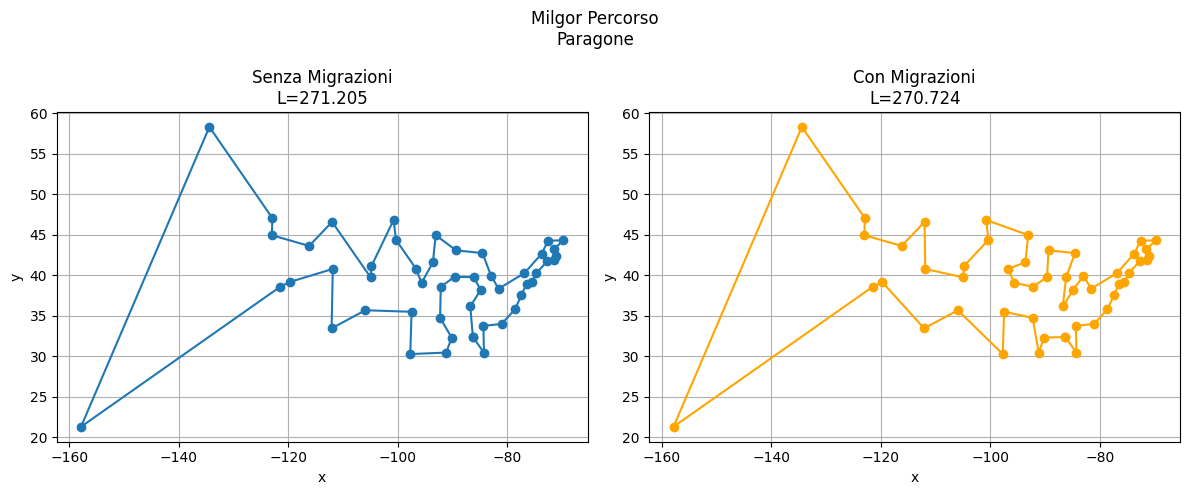

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,5))


single=np.loadtxt("Single/output1.dat")
single=np.append(single,single[0])
single=np.reshape(single,(int(np.shape(single)[0]/2),2))
ax[0].plot(single[:,0],single[:,1],label="Senza Migrazioni",marker='o')
ax[0].set_title(f"Senza Migrazioni\nL={mins[0]}")

migrat=np.loadtxt("Migration/output0.dat")
migrat=np.append(migrat,migrat[0])
migrat=np.reshape(migrat,(int(np.shape(migrat)[0]/2),2))
ax[1].plot(migrat[:,0],migrat[:,1],label="con Migrazioni",marker='o',color='orange')
ax[1].set_title(f"Con Migrazioni\nL={mins[1]}")

for i in range(2):
    ax[i].set(
        xlabel="x",
        ylabel="y"
    )
    ax[i].grid(True)

fig.suptitle(f"Milgor Percorso\nParagone")

plt.tight_layout()
plt.show()

Possiamo vedere che le soluzioni siano diverse ed in questo caso la presenza dei continenti ha dato un risultato minore, questo non è sempre vero: provando con $30$ migrazioni il risultato è nettamente diverso.  In ogni caso queste sono risultati possibili solo grazie al calcolo parallelo, poichè nel primo caso avremmo avuto solo un risultato che non è detto possa essere quello tovato e nel secondo caso non avremmo avuto le migrazioni.